# ATML Project Report 
## American Sign Language Recognition

"finger spelling" Dataset: http://empslocal.ex.ac.uk/people/staff/np331/index.php?section=FingerSpellingDataset  
"kaggle" Dataset: https://www.kaggle.com/grassknoted/asl-alphabet  

Paper: Alphabet Sign Language Image Classification Using Deep Learning (https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8650241)  
  

Goal: Get better result than the proposed solution of the paper in american sign language recognition.

## Task description

Sign Language provides individuals who have hearing and speech impairment with a way to communicate with hand gestures. It could be used as a means of communication with other people as well. However, understanding sign language is challenging since there are many hand poses and gestures to memorize. So there is a need of an automatic sign language recognition system that allows everyone to understand sign language.

Our goal is to recognize alphabets in American Sign Language by using deep learning. For training our model, we’ve used the ‘finger spelling’ dataset from the “Spelling It Out: Real–Time ASL Fingerspelling Recognition” paper.



## Approach description

We first implemented our solution according to the paper "Alphabet Sign Language Image Classification Using Deep Learning" found on IEEEExplorer. We chose the paper because it uses a rather novel approach to image classification called DenseNet which we will describe later. Even though we have depth data available in our dataset, we followed the approach described in the paper and discarded this data. The reasoning behind not using the depth data is, that recognition using only RGB data is more widely applicable, since depth sensors are only very narrowly available in comparison to cameras.

## Dataset

The "finger spelling" dataset used for training and test consists of over 50'000 images of static hand gestures. They are separated in 24 classes for the 24 letters. The alphabets "j" and "z" are omitted, since these signs require motion and can therefore not be classified using still images. All of the images belong to one of 5 people. We made sure, to use all images of one person as the test set, so the model will be confronted with an entirely new person for testing. We then split the remaining images into training and validation sets with the ratio of 9:1. For the data preprocessing, we resized all the images to the size of 32 x 32 pixels.

## The Network - DenseNet

We chose the paper "Alphabet Sign Language Image Classification Using Deep Learning" because of its use of Densely connected Convolutional Networks (DenseNet). DenseNets were introduced in August of 2016 in the paper “Densely Connected Convolutional Networks” which has been awarded the [CVPR 2017 Best Paper Award](http://cvpr2017.thecvf.com/program/main_conference#cvpr2017_awards).

Similar to ResNet, Densely connected Convolutional Networks try to solve the problem of vanishing-gradient. But unlike ResNet which sums the output feature maps of the layer with the incoming feature maps, DenseNet concatenates all feature maps of the preceding layers. So each layer gets a “collective knowledge” from all preceding layers. As a result the network is thinner and more compact which means the number of input channel can be smaller. DenseNet also encourages the feature reuse across layers, but in the same time minimizes the number of parameters.

![ResNet](ressources/ResNet.png)
*ResNet*

![DenseNet](ressources/DenseNet.png)
*DenseNet*

Normally a DenseNet is built of multiple Dense blocks and between the blocks there is a transition layer. Each Dense block consists of multiple layers of batch normalization, relu activation and 3x3 convolutional layer. A transition layer on the other hand is only made out of a batch normalization, relu, a 1x1 convolutional layer and a 2x2 average pooling layer.

## Implementation

We used the [provided DenseNet model from Pytorch](https://pytorch.org/docs/stable/_modules/torchvision/models/densenet.html). We trained 2 models with two different settings:
- **DenseNet w/o data augmentation:** In DenseNet, each layer is densely connected so that it receives feature maps from all preceding layers, which makes the network thinner and compact.
- **DenseNet with data Augmentation:** We applied data augmentation with the DenseNet architecture. The augmentation includes random horizontal flip, random resize, random crop and color jittering.

We trained the two settings with the "finger spelling" dataset for 300 epoch with a batch size of 32. We use "Adam" as the optimizer with learning rate of 0.001 and saved the losses and accuracies of training and validation for every epoch. For the prediction we used categorical cross entropy loss to measure the performance of the classification model. The output of the network is a 24-dimensional vector with the corresponding probability for each letter.

We then use the trained DenseNet model with the two different settings to test on two different datasets and reported the accuracies.


## Results

- **DenseNet**
In DenseNet, each layer is densely connected so that it receives feature maps from all preceding layers, which makes the network thinner and compact.
- **Data Augmentation**
We applied just data augmentation with the DenseNet architecture
  
We train the two settings with the "finger spelling" dataset for 300 epoch. We use "Adam" as the optimizer with learning rate of 0.001 and report the losses and accuracies of training and validation for every epoch.  
  
| Setting | Train accuracy | Validation accuracy |
|------|------|------|
| DenseNet | 99.9685 | 99.9245 |
| DenseNet with Augmentation | 50.3439 | 94.2264 |

We used a trained DenseNet model from above and applied to two different datasets for the test and report the accuracies.

| Setting | "finger spelling" testset | "kaggle" testset |
|------|------|------|
| DenseNet | 83.852 |  2.625 |
| DenseNet with Augmentation | 65.138 | 4.739 |

### Learning Curves of training the DenseNet without data augmentation

In [10]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

with open('../results/main.sh.o32224', 'r') as f:
    for line in f:
        splitted = line.split()
        if (splitted[0] != 'Test'):
            train_losses.append(float(splitted[3].replace(",", "")))
            train_accuracies.append(float(splitted[5].replace(",", "")))
            val_losses.append(float(splitted[7].replace(",", "")))
            val_accuracies.append(float(splitted[9].replace(",", "")))

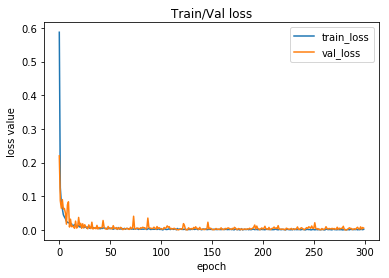

In [11]:
#Plotting loss
import numpy as np
import matplotlib.pyplot as plt

n_epochs = 300
plt.figure()
plt.plot(np.arange(n_epochs), train_losses)
plt.plot(np.arange(n_epochs), val_losses)
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title('Train/Val loss')

plt.show()

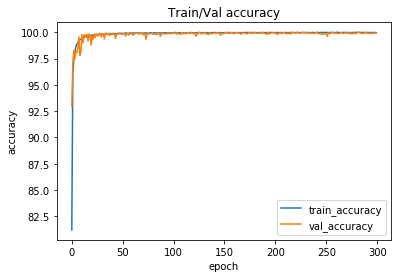

In [12]:
#Plotting accuracy
import numpy as np
import matplotlib.pyplot as plt

n_epochs = 300
plt.figure()
plt.plot(np.arange(n_epochs), train_accuracies)
plt.plot(np.arange(n_epochs), val_accuracies)
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train/Val accuracy')

plt.show()

### Learning Curves of training the DenseNet with data augmentation

In [6]:
train_losses_aug = []
train_accuracies_aug = []
val_losses_aug = []
val_accuracies_aug = []

with open('../results/main.sh.o32280', 'r') as f:
    for line in f:
        splitted = line.split()
        if (splitted[0] != 'Test'):
            train_losses_aug.append(float(splitted[4].replace(",", "")))
            train_accuracies_aug.append(float(splitted[6].replace(",", "")))
            val_losses_aug.append(float(splitted[8].replace(",", "")))
            val_accuracies_aug.append(float(splitted[10].replace(",", "")))

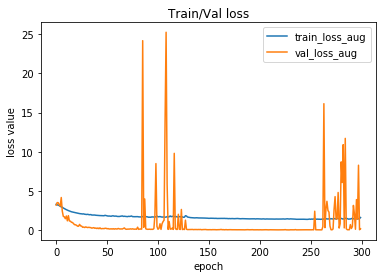

In [7]:
#Plotting loss
import numpy as np
import matplotlib.pyplot as plt

n_epochs = 300
plt.figure()
plt.plot(np.arange(n_epochs), train_losses_aug)
plt.plot(np.arange(n_epochs), val_losses_aug)
plt.legend(['train_loss_aug', 'val_loss_aug'])
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title('Train/Val loss')

plt.show()

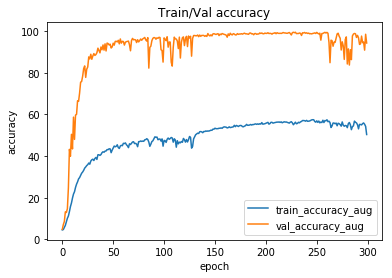

In [8]:
#Plotting accuracy
import numpy as np
import matplotlib.pyplot as plt

n_epochs = 300
plt.figure()
plt.plot(np.arange(n_epochs), train_accuracies_aug)
plt.plot(np.arange(n_epochs), val_accuracies_aug)
plt.legend(['train_accuracy_aug', 'val_accuracy_aug'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train/Val accuracy')

plt.show()

## Analysis

### DenseNet without data augmentation
The result of DenseNet without data augmentation shows high accuracy for both training and validation of around 99%. As we can see in the plot of the loss, the model converges quite fast and since the training and validation loss are similar, the model has a good fit. Testing on the “finger spelling” test set results also in a decent accuracy of 83.9%. But applying the trained model on a new test dataset, the reported accuracy is really bad (2.6%). This concludes that the model is not generalized at all. So only similar data fits the model. We discovered the reason for that in the data sets we used for testing. The “finger spelling” dataset consists of images mostly in the front angle of hand gestures.

![finger spelling example](ressources/finger_spelling_examples.png)
*“finger spelling” dataset hand gesture for letters  “c”, “f” and “o”*

The “kaggle” dataset only consists images of side angle, either right or left.

![kaggle_examples](ressources/kaggle_examples.png)
*“kaggle” dataset hand gesture for letters “c”, “f” and “o”*

So because of the missing angle in the training dataset, the model does not recognize the letters of second dataset.

### DenseNet with data augmentation

When we trained the DenseNet with data augmentation, validation accuracy is higher than train accuracy. Based on the plot of the losses the model is neither underfitting nor overfitting. The test accuracy on the “finger spelling” dataset is also worse than the model without data augmentation.

A reason for the ‘unknown fit’ could be following : 
Network’s behaviour is different when training and testing. In the training part, the network decides to discard a lot of features that, it thinks, are not needed, however, in the validation part the features are still kept, making the model at validation test more robust and this results in a higher validation accuracy.

When we applied the model with data augmentation to the “kaggle” dataset for testing, the accuracy was also really low, but it is higher than the model without the data augmentation setting. This shows that the augmented model generalized better than the normal one. It seems the model kept some information that increased the generalisation a bit.


## Guide to use code

### Example of use with step by step instructions

### Densenet without data augmentation

In [80]:
#Load the libraries
import torch
from PIL import Image
#Load the model (DenseNet without data augmentation)
from torchvision.models import DenseNet
model_full = DenseNet(num_classes=24)
model_full.load_state_dict(torch.load("../model_full.pt", map_location=torch.device('cpu')))
model_full.eval();

In [81]:
#Load sample image
import numpy as np
image = Image.open('../data/test/g/color_6_0006.png').convert('L')

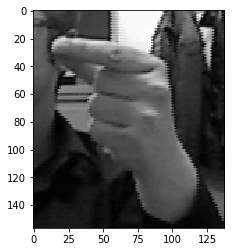

In [82]:
# Show image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image)

In [83]:
from torchvision.transforms import functional
#Run prediction
label2name = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e', 5:'f', 6:'g', 7:'h', 8:'i', 9:'k', 10:'l',
             11:'m', 12:'n', 13:'o', 14:'p', 15:'q', 16:'r', 17:'s', 18:'t', 19:'u', 20:'v', 21:'w',
             22:'x', 23:'y'}


image = image.convert('RGB')
image = image.resize([32,32])
with torch.no_grad():
    out = model_full(functional.to_tensor(image).view(1,3,32,32))
    prediction = out.argmax(1)

In [84]:
print('Prediction: {}'.format(label2name[prediction.item()]))

Prediction: a


### DenseNet with data augmentation

In [85]:
#Load the model ( Densenet with data augmentation)
model_full_augmented = DenseNet(num_classes=24)
model_full_augmented.load_state_dict(torch.load("../model_full_augmented.pt", map_location=torch.device('cpu')))
model_full_augmented.eval();

In [88]:
#Load sample image
import numpy as np
image2 = Image.open('../data/test/i/color_8_0010.png').convert('L')

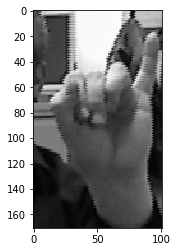

In [89]:
# Show image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image2)

In [90]:
image2 = image2.convert('RGB')
image2 = image2.resize([32,32])
with torch.no_grad():
    out_aug = model_full(functional.to_tensor(image2).view(1,3,32,32))
    prediction_aug = out.argmax(1)

In [91]:
print('Prediction: {}'.format(label2name[prediction_aug.item()]))

Prediction: a
